# Model Validation and coefficient calculation

Marc Pérez  
May 22, 2025

In [ ]:

library(multcomp)


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser

Loading required package: carData

Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList


Attaching package: 'dplyr'

The following object is masked from 'package:kableExtra':

    group_rows

The following object is masked from 'package:nlme':

    collapse

The following object is masked from 'package:car':

    recode

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'MuMIn':
  method        from 
  nobs.multinom broom
  nobs.fitdistr broom


Attaching package: 'sjmisc'

The following object is masked from 'package:tidyr':

    replace_na

## Research Questions:

### How well can current GRUD measurements of $C_P$ predict the relative Yield, P-Uptake and P-Balance?

-   Hypothesis I: The measurements of the equlibrium concentrations of Phosphorus in a solvent do not display significant effects on relative Yield and consequently P-Uptake, since it is strongly dependent on yield. $C_P$ relates strongly to the amount of Phosphorus applied, the P-balance might well be siginificantly correlated to $C_P$ but not explain a lot of variance.

(`geom_point()`).

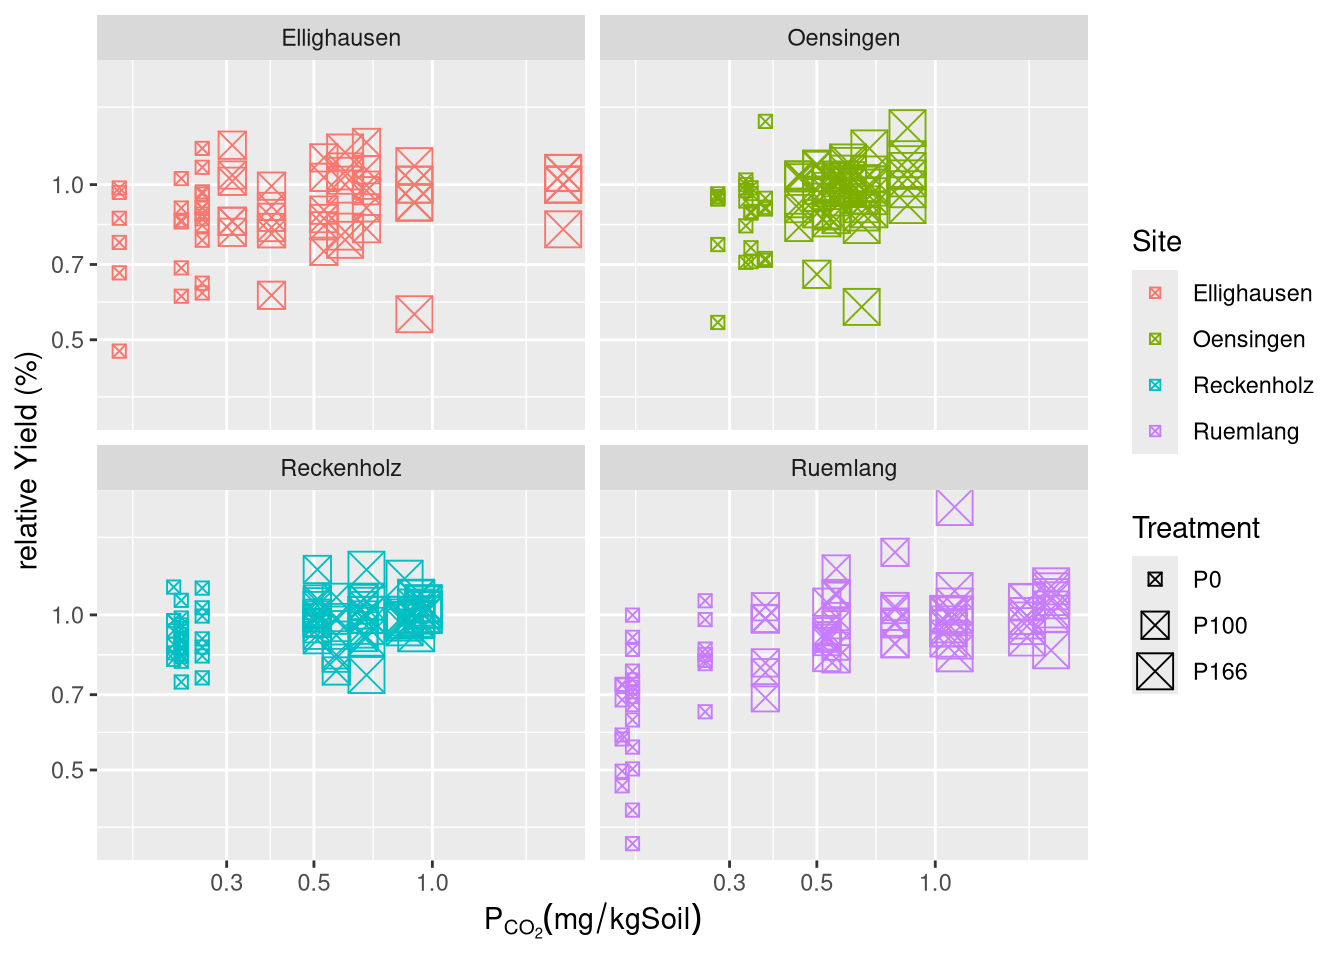

Removed 23 rows containing missing values or values outside the scale range
(`geom_point()`).

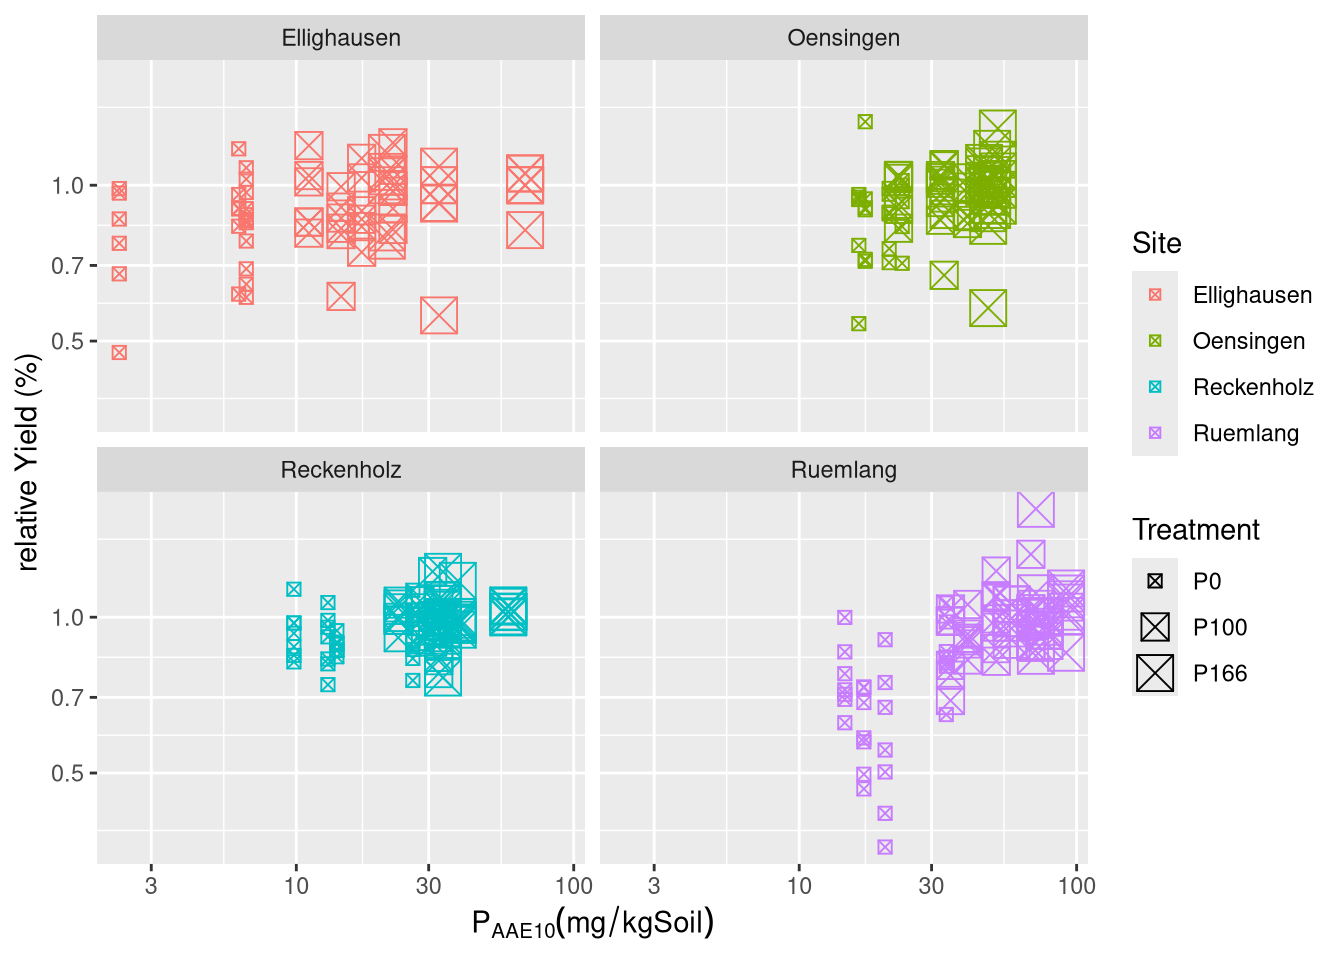

(`geom_point()`).

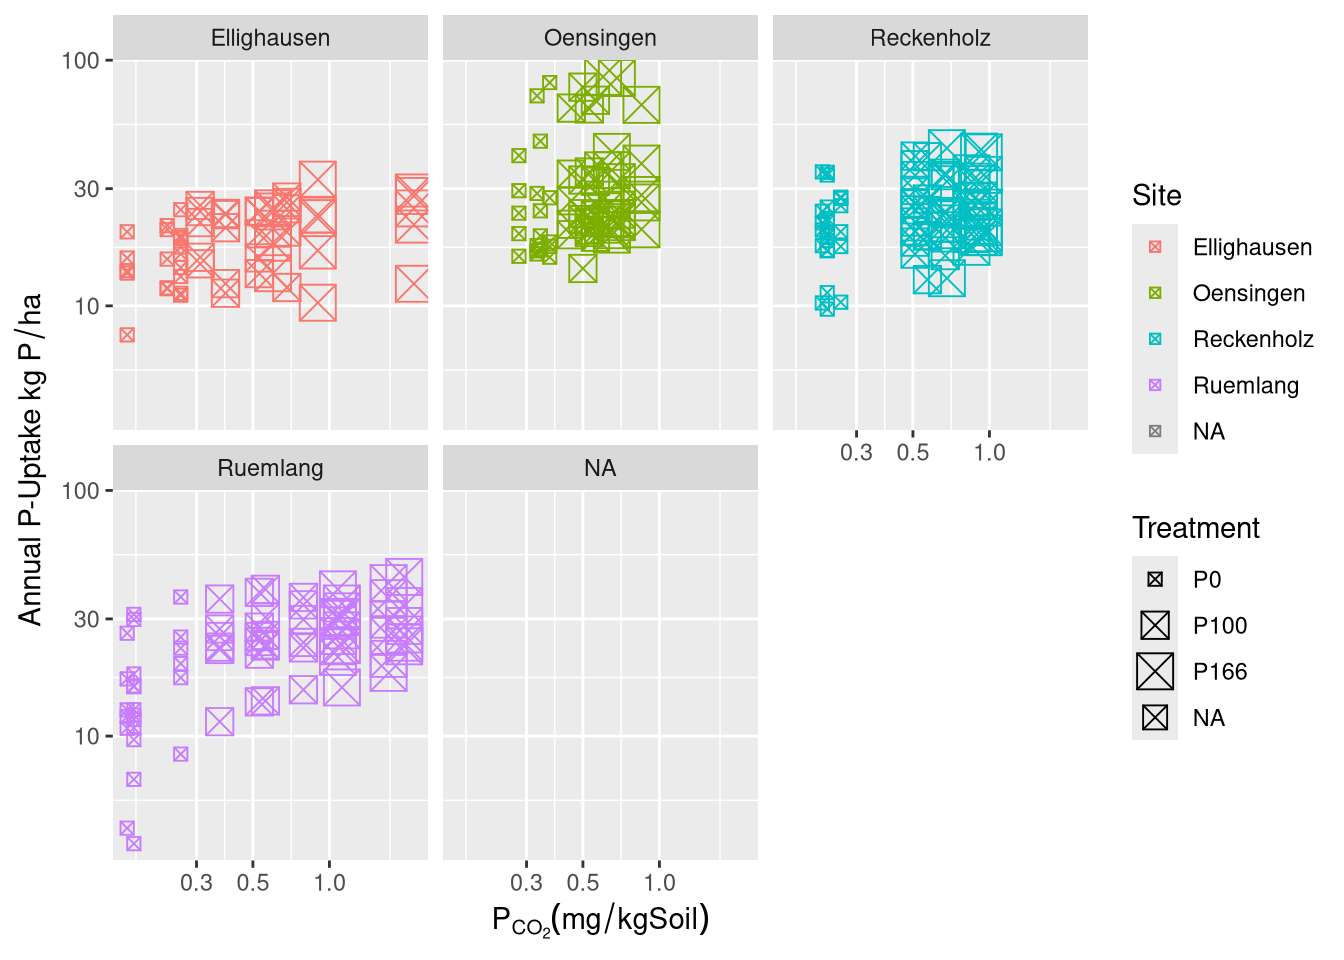

Removed 70 rows containing missing values or values outside the scale range
(`geom_point()`).

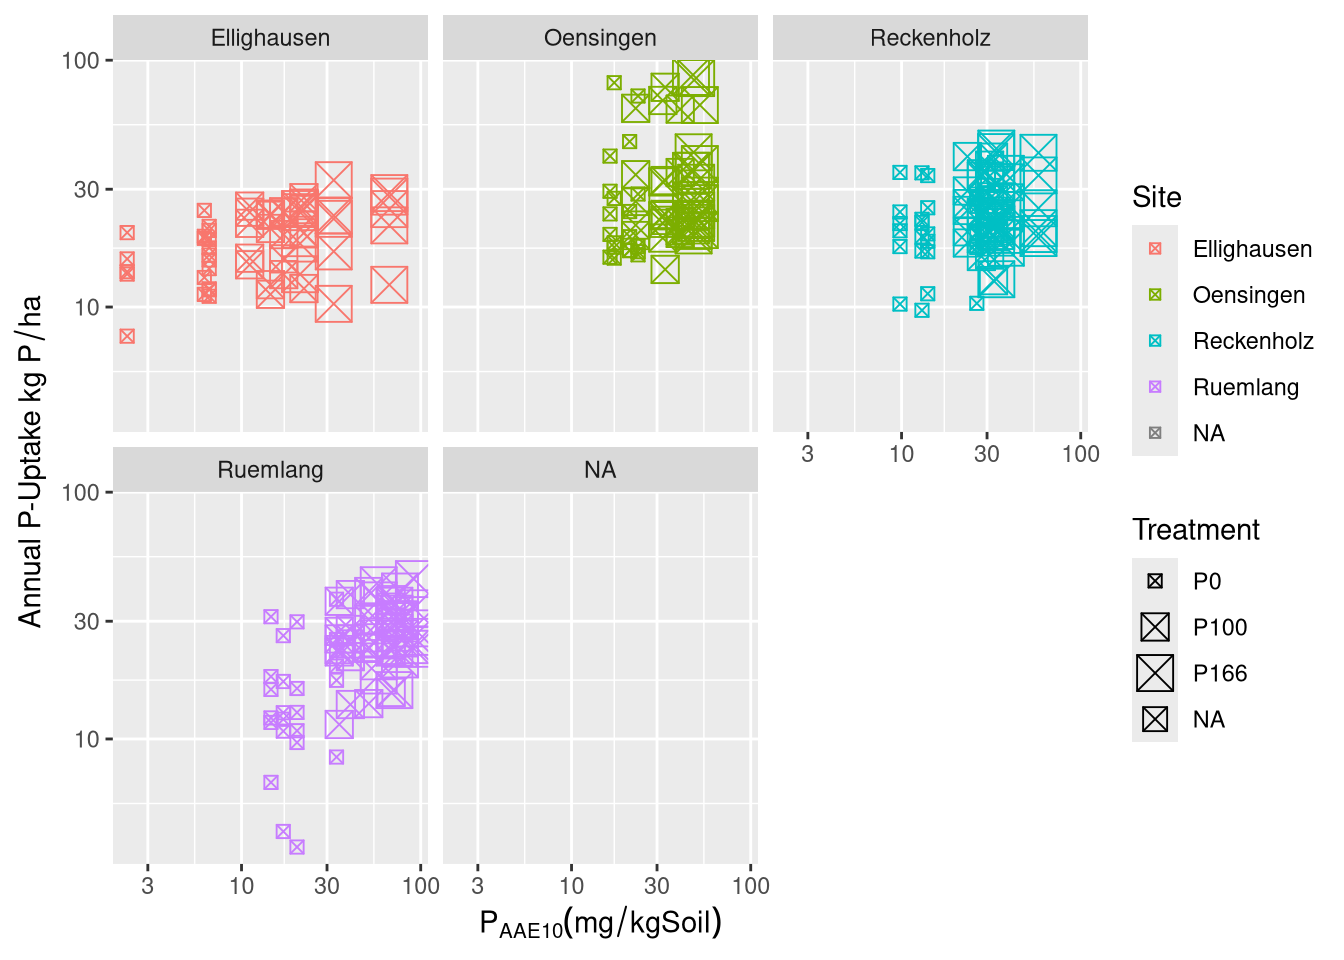

Warning in transformation$transform(x): NaNs produced

Warning in scale_y_log10(): log-10 transformation introduced infinite values.

(`geom_point()`).

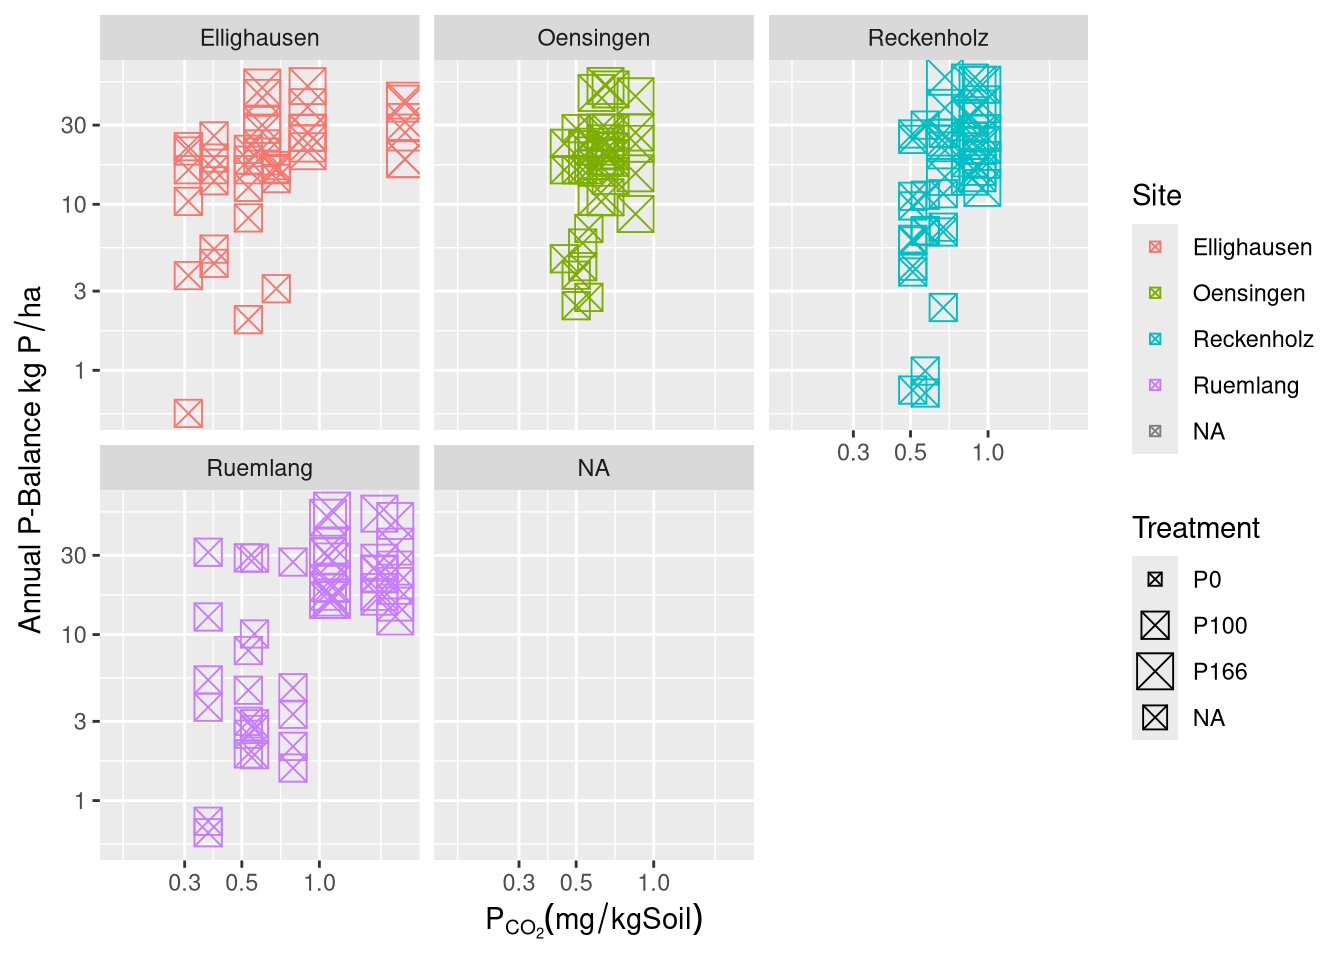

Warning in transformation$transform(x): NaNs produced

Warning in scale_y_log10(): log-10 transformation introduced infinite values.

(`geom_point()`).

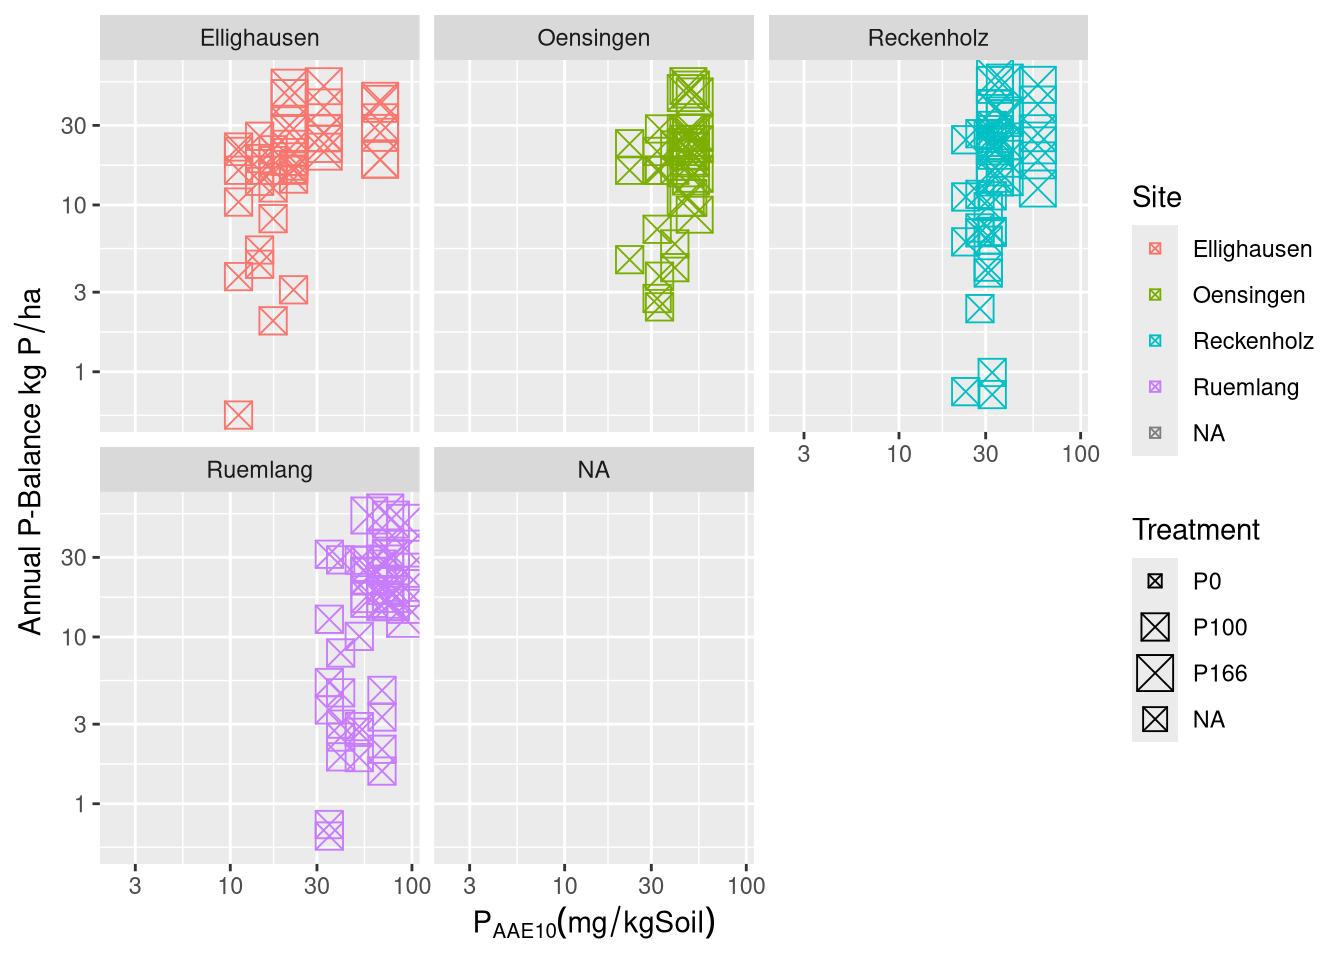

In [ ]:

ggplot(D[D$soil_0_20_P_CO2!=0,],aes(y=Ymain_norm, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) + 
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{CO_{2}}(mg/kg Soil)$"),
         y="relative Yield (%)") +
  facet_wrap( ~ Site, nrow = 2)


Now we want to check the strength of the models in terms of $R^2$ and the significance of the effects in terms of p-values:

In [ ]:

#tab_model(fit.grud.Yrel,fit.grud.Puptake,fit.grud.Pbalance)
report(fit.grud.Yrel)


Loading required namespace: lmerTest

Formula contains log- or sqrt-terms.
  See help("standardize") for how such terms are standardized.
Formula contains log- or sqrt-terms.
  See help("standardize") for how such terms are standardized.

We fitted a linear mixed model (estimated using REML and nloptwrap optimizer)
to predict Ymain_rel with soil_0_20_P_CO2 and soil_0_20_P_AAE10 (formula:
Ymain_rel ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10)). The model included
year as random effects (formula: list(~1 | year, ~1 | Site, ~1 | Site:block, ~1
| Site:Treatment)). The model's total explanatory power is substantial
(conditional R2 = 0.58) and the part related to the fixed effects alone
(marginal R2) is of 0.07. The model's intercept, corresponding to
soil_0_20_P_CO2 = 0 and soil_0_20_P_AAE10 = 0, is at 108.49 (95% CI [73.65,
143.34], t(204) = 6.14, p < .001). Within this model:

  - The effect of soil 0 20 P CO2 [log] is statistically significant and positive
(beta = 9.69, 95% CI [1.35, 18.03], t(204) = 2.29, p = 0.023; Std. beta = 0.24,
95% CI [-0.42, 0.91])
  - The effect of soil 0 20 P AAE10 [log] is statistically non-significant and
negative (beta = -0.93, 95% CI [-9.14, 7.28], t(204) = -0.22, p = 0.823; Std.
beta = 0

Formula contains log- or sqrt-terms.
  See help("standardize") for how such terms are standardized.

boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.

Formula contains log- or sqrt-terms.
  See help("standardize") for how such terms are standardized.
boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.

We fitted a linear mixed model (estimated using REML and nloptwrap optimizer)
to predict annual_P_uptake with soil_0_20_P_CO2 and soil_0_20_P_AAE10 (formula:
annual_P_uptake ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10)). The model
included year as random effects (formula: list(~1 | year, ~1 | Site, ~1 |
Site:block, ~1 | Site:Treatment)). The model's explanatory power related to the
fixed effects alone (marginal R2) is 0.15. The model's intercept, corresponding
to soil_0_20_P_CO2 = 0 and soil_0_20_P_AAE10 = 0, is at 24.73 (95% CI [7.95,
41.50], t(251) = 2.90, p = 0.004). Within this model:

  - The effect of soil 0 20 P CO2 [log] is statistically significant and positive
(beta = 4.56, 95% CI [1.04, 8.09], t(251) = 2.55, p = 0.011; Std. beta = 0.29,
95% CI [-0.20, 0.79])
  - The effect of soil 0 20 P AAE10 [log] is statistically non-significant and
positive (beta = 0.72, 95% CI [-3.01, 4.46], t(251) = 0.38, p = 0.703; Std.
beta = 0.45, 95% CI [-0.17, 1.07])

Standardized parameters we

Formula contains log- or sqrt-terms.
  See help("standardize") for how such terms are standardized.
boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.

Formula contains log- or sqrt-terms.
  See help("standardize") for how such terms are standardized.
boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.

We fitted a linear mixed model (estimated using REML and nloptwrap optimizer)
to predict annual_P_balance with soil_0_20_P_CO2 and soil_0_20_P_AAE10
(formula: annual_P_balance ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10)).
The model included year as random effects (formula: list(~1 | year, ~1 | Site,
~1 | Site:block, ~1 | Site:Treatment)). The model's explanatory power related
to the fixed effects alone (marginal R2) is 3.54e-03. The model's intercept,
corresponding to soil_0_20_P_CO2 = 0 and soil_0_20_P_AAE10 = 0, is at 6.58 (95%
CI [-23.64, 36.79], t(266) = 0.43, p = 0.669). Within this model:

  - The effect of soil 0 20 P CO2 [log] is statistically non-significant and
negative (beta = -0.43, 95% CI [-8.71, 7.85], t(266) = -0.10, p = 0.919; Std.
beta = -1.18e-03, 95% CI [-0.50, 0.49])
  - The effect of soil 0 20 P AAE10 [log] is statistically non-significant and
negative (beta = -0.55, 95% CI [-7.41, 6.32], t(266) = -0.16, p = 0.876; Std.
beta = -0.06, 95% CI [-0.58, 0.46])

Stan

here I also show the non linear mixed models, following the Mitscherlich saturation curve:

In [ ]:


library(nlme)

# Make sure grouping variables are factors
D$year  <- as.factor(D$year)
D$Site  <- as.factor(D$Site)
D$block <- as.factor(D$block)
D$crop <- as.factor(D$crop)
# Fit the model
fit.mitscherlich.CO2.Yrel <- nlme(
  Ymain_rel ~ A * (1 - exp(-k * soil_0_20_P_CO2 + E)),                
  fixed = A + k + E ~ soil_0_20_clay + soil_0_20_pH_H2O + ansum_sun + ansum_prec,
  random = A ~ 1 | year/Site/block,
  data = D,
  start = c(
    A = 220, A1 = 0, A2 = 0, A3 = 0, A4 = 0,
    k = 0.05, k1 = 0, k2 = 0, k3 = 0, k4 = 0,
    E = -3, E1 = 0, E2 = 0, E3 = 0, E4 = 0
  ),
  control = nlmeControl(maxIter = 500),
  na.action = na.omit
)

summary(fit.mitscherlich.CO2.Yrel)


Nonlinear mixed-effects model fit by maximum likelihood
  Model: Ymain_rel ~ A * (1 - exp(-k * soil_0_20_P_CO2 + E)) 
  Data: D 
       AIC      BIC    logLik
  757.9208 806.2434 -359.9604

Random effects:
 Formula: A ~ 1 | year
        A.(Intercept)
StdDev:   0.001016958

 Formula: A ~ 1 | Site %in% year
        A.(Intercept)
StdDev:      3.714602

 Formula: A ~ 1 | block %in% Site %in% year
        A.(Intercept) Residual
StdDev:  2.056359e-05 10.74343

Fixed effects:  A + k + E ~ soil_0_20_clay + soil_0_20_pH_H2O + ansum_sun + ansum_prec 
                      Value Std.Error DF   t-value p-value
A.(Intercept)       268.346    71.252 48  3.766146  0.0005
A.soil_0_20_clay     -0.204     0.360 48 -0.567124  0.5733
A.soil_0_20_pH_H2O   -3.225     2.999 48 -1.075356  0.2876
A.ansum_sun          -0.050     0.022 48 -2.267206  0.0279
A.ansum_prec         -0.057     0.026 48 -2.168568  0.0351
k.(Intercept)      6951.745  8043.624 48  0.864255  0.3917
k.soil_0_20_clay     24.252    28.962 48

                   numDF denDF   F-value p-value
A.(Intercept)          1    48 2513.0728  <.0001
A.soil_0_20_clay       1    48    8.0856  0.0065
A.soil_0_20_pH_H2O     1    48    0.1914  0.6637
A.ansum_sun            1    48    1.3430  0.2522
A.ansum_prec           1    48    1.7164  0.1964
k.(Intercept)          1    48   22.7614  <.0001
k.soil_0_20_clay       1    48    0.4312  0.5145
k.soil_0_20_pH_H2O     1    48    0.7129  0.4027
k.ansum_sun            1    48    0.0182  0.8931
k.ansum_prec           1    48   16.0441  0.0002
E.(Intercept)          1    48    7.5467  0.0084
E.soil_0_20_clay       1    48    0.0036  0.9525
E.soil_0_20_pH_H2O     1    48    0.2209  0.6405
E.ansum_sun            1    48    0.0187  0.8918
E.ansum_prec           1    48    0.7173  0.4012

# Indices of model performance

AIC     |    AICc |     BIC |   RMSE |  Sigma
---------------------------------------------
786.407 | 796.677 | 834.730 | 10.479 | 10.743

With the covariate and random effect used as by Juliane Hirte we obtain $R^2=$ 0.8760268, I don’t know how to interpret that, I fear that the model is overfitting data.

### How do GRUD-measurements of $C_P$ relate to the soil properties $C_\text{org}$-content, clay-content, silt-content and pH?

-   Hypothesis II: Given the known capacity of clay and silt compounds to adsorb orthophosphate a positive correlation between $C_P$ (for both $CO_2$ and AAE10) and silt- and clay-content. $C_\text{org}$ has been reported to positively influence the capacity of Phosphorus as well, it is plausible it also shows a positive correlation with $C_P$. AAE10 also deploys $Na_4EDTA$ which is easily captured by $Mg^{2+}$ and $Ca^{2+}$, therefore it is officially by GRUD advised against being used in soils with $\text{pH}>6.8$, therefore $C_P$-AAE10 will presumably be negatively correlated to pH.

In [ ]:


anova(fit.soil.CO2)


Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value  Pr(>F)  
soil_0_20_clay   0.001204 0.001204     1 55.784  0.0365 0.84927  
soil_0_20_pH_H2O 0.166954 0.166954     1 68.215  5.0574 0.02775 *
soil_0_20_Corg   0.195107 0.195107     1 44.241  5.9103 0.01917 *
soil_0_20_silt   0.031962 0.031962     1 81.136  0.9682 0.32805  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            R2m       R2c
[1,] 0.03473249 0.9306904

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.02462 0.02462     1 70.278  0.6521  0.422079    
soil_0_20_pH_H2O 0.79836 0.79836     1 75.915 21.1499 1.666e-05 ***
soil_0_20_Corg   0.31812 0.31812     1 56.367  8.4276  0.005266 ** 
soil_0_20_silt   0.00145 0.00145     1 87.492  0.0383  0.845249    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            R2m      R2c
[1,] 0.09051181 0.931398

### Can the Inclusion of the net-release-kinetic of Orthophosphate improve the model power of predicting relative Yield, P-Uptake and P-Balance?

-   Hypothesis III: Given the comparably low solubility of $PO_4^{3-}$ in the water-soil interface, most P is transported to the rhizosphere via diffusion. As a consequence the intensity of $PO_4^{3-}$ might not adequately account for the P-uptake in the harvested plant. Since the diffusion process is in its velocity a kinetic and in its finally reached intensity a thermodynamic process, the inclusion of kinetic parameters might well improve the performance.

In [ ]:

fit.mitscherlich.PS.Yrel <- nlme(
  Ymain_rel ~ A * (1 - exp(-r * PS + E)),                
  fixed = A + r + E ~ k + soil_0_20_clay + soil_0_20_pH_H2O + ansum_sun + ansum_prec,
  random = A ~ 1 | year/Site/block,
  data = D,
  start = c(
    A = 220, A1 = 0, A2 = 0, A3 = 0, A4 = 0, A5 = 0,
    r = 1, r1 = 0, r2 = 0, r3 = 0, r4 = 0, r5 = 0,
    E = -1, E1 = 0, E2 = 0, E3 = 0, E4 = 0, E5 = 0
  ),
  control = nlmeControl(maxIter = 500),
  na.action = na.omit
)

summary(fit.mitscherlich.PS.Yrel)


Nonlinear mixed-effects model fit by maximum likelihood
  Model: Ymain_rel ~ A * (1 - exp(-r * PS + E)) 
  Data: D 
      AIC      BIC   logLik
  756.704 812.6565 -356.352

Random effects:
 Formula: A ~ 1 | year
        A.(Intercept)
StdDev:   0.001434366

 Formula: A ~ 1 | Site %in% year
        A.(Intercept)
StdDev:      4.135705

 Formula: A ~ 1 | block %in% Site %in% year
        A.(Intercept) Residual
StdDev:  2.098085e-05 10.26954

Fixed effects:  A + r + E ~ k + soil_0_20_clay + soil_0_20_pH_H2O + ansum_sun +      ansum_prec 
                       Value Std.Error DF    t-value p-value
A.(Intercept)       159.3520   91.1962 45  1.7473529  0.0874
A.k                 -25.4193   30.3021 45 -0.8388642  0.4060
A.soil_0_20_clay      0.3554    0.4095 45  0.8678259  0.3901
A.soil_0_20_pH_H2O    4.9194    4.3133 45  1.1405232  0.2601
A.ansum_sun          -0.0257    0.0269 45 -0.9524325  0.3460
A.ansum_prec         -0.0623    0.0288 45 -2.1634395  0.0359
r.(Intercept)      2284.8408 1418.

                   numDF denDF   F-value p-value
A.(Intercept)          1    45 2488.4068  <.0001
A.k                    1    45    2.3144  0.1352
A.soil_0_20_clay       1    45    2.2731  0.1386
A.soil_0_20_pH_H2O     1    45   29.8949  <.0001
A.ansum_sun            1    45    6.5752  0.0137
A.ansum_prec           1    45    2.6606  0.1098
r.(Intercept)          1    45   21.0005  <.0001
r.k                    1    45    1.9181  0.1729
r.soil_0_20_clay       1    45    0.1437  0.7064
r.soil_0_20_pH_H2O     1    45    6.0053  0.0182
r.ansum_sun            1    45    0.1454  0.7048
r.ansum_prec           1    45    9.4644  0.0036
E.(Intercept)          1    45   26.4308  <.0001
E.k                    1    45    0.9943  0.3240
E.soil_0_20_clay       1    45    0.0699  0.7926
E.soil_0_20_pH_H2O     1    45    0.0668  0.7973
E.ansum_sun            1    45    0.8021  0.3752
E.ansum_prec           1    45    2.0530  0.1588

# Indices of model performance

AIC     |    AICc |     BIC |  RMSE |  Sigma
--------------------------------------------
765.695 | 779.948 | 821.647 | 9.989 | 10.270

Nonlinear mixed-effects model fit by maximum likelihood
  Model: Ymain_rel ~ A * (1 - exp(-k * PS + E)) 
  Data: D 
       AIC      BIC    logLik
  757.7736 793.3798 -364.8868

Random effects:
 Formula: A ~ 1 | year
        A.(Intercept)
StdDev:    0.00112278

 Formula: A ~ 1 | Site %in% year
        A.(Intercept)
StdDev:   0.008239412

 Formula: A ~ 1 | block %in% Site %in% year
        A.(Intercept) Residual
StdDev:   2.69498e-05 11.73805

Fixed effects:  A + E ~ soil_0_20_clay + soil_0_20_pH_H2O + ansum_sun + ansum_prec 
                       Value Std.Error DF   t-value p-value
A.(Intercept)      2690.1350  985.2790 53  2.730328  0.0086
A.soil_0_20_clay      5.8621    3.0618 53  1.914606  0.0609
A.soil_0_20_pH_H2O  -75.2347   37.4744 53 -2.007628  0.0498
A.ansum_sun          -0.7671    0.2684 53 -2.858049  0.0061
A.ansum_prec         -0.6208    0.2478 53 -2.505009  0.0154
E.(Intercept)         0.6989    0.5030 53  1.389531  0.1705
E.soil_0_20_clay      0.0069    0.0040 53  1.71568

                   numDF denDF   F-value p-value
A.(Intercept)          1    53 14865.096  <.0001
A.soil_0_20_clay       1    53   474.026  <.0001
A.soil_0_20_pH_H2O     1    53     0.724  0.3986
A.ansum_sun            1    53   286.635  <.0001
A.ansum_prec           1    53   305.097  <.0001
E.(Intercept)          1    53     1.553  0.2182
E.soil_0_20_clay       1    53     3.035  0.0873
E.soil_0_20_pH_H2O     1    53     0.401  0.5295
E.ansum_sun            1    53     3.082  0.0850
E.ansum_prec           1    53     2.038  0.1593

# Indices of model performance

AIC     |    AICc |     BIC |   RMSE |  Sigma
---------------------------------------------
804.491 | 809.807 | 840.097 | 11.738 | 11.738

With the covariate and random effect used as by Juliane Hirte we obtain $R^2=$ 0.8873534, I don’t know how to interpret that, I fear that the model is overfitting data, the same might be true for the model that used $k\times PS$ as a predictor with $R^2=$ 0.8444393.

I also tried more conservative models, where I log-transformed the concentrations and PS, also I was more cautious with random effects. This resulted in coefficients that were not as straight-forward as the mitscherlich coefficients to interpret.

In [ ]:

# relative Yield
anova(fit.kin.Yrel)


Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
k          950.33  950.33     1 201.84  4.6170 0.03285 *
log(PS)    189.78  189.78     1 202.30  0.9220 0.33809  
k:log(PS) 1303.51 1303.51     1 202.45  6.3329 0.01263 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Ymain_rel ~ k * log(PS) + (1 | year) + (1 | Site) + (1 | Site:block)
   Data: D

REML criterion at convergence: 1730.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1869 -0.5926 -0.0312  0.5711  2.9028 

Random effects:
 Groups     Name        Variance Std.Dev.
 Site:block (Intercept)   0.0     0.000  
 year       (Intercept) 160.1    12.655  
 Site       (Intercept)  95.2     9.757  
 Residual               205.8    14.347  
Number of obs: 212, groups:  Site:block, 16; year, 5; Site, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   92.654     13.428  57.374   6.900 4.53e-09 ***
k            129.815     60.415 201.842   2.149   0.0328 *  
log(PS)       -4.729      4.925 202.300  -0.960   0.3381    
k:log(PS)     65.007     25.832 202.453   2.517   0.0126 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correl

            R2m       R2c
[1,] 0.09057145 0.5941011

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
k         35.305  35.305     1 247.74  0.5252 0.4693
log(PS)   39.586  39.586     1 248.15  0.5889 0.4436
k:log(PS) 53.624  53.624     1 248.29  0.7978 0.3726

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_uptake ~ k * log(PS) + (1 | year) + (1 | Site) + (1 |  
    Site:block)
   Data: D

REML criterion at convergence: 1835.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1240 -0.4693 -0.0175  0.3715  4.7721 

Random effects:
 Groups     Name        Variance Std.Dev.
 Site:block (Intercept)  0.00    0.000   
 year       (Intercept) 73.71    8.585   
 Site       (Intercept) 37.56    6.129   
 Residual               67.22    8.199   
Number of obs: 259, groups:  Site:block, 16; year, 6; Site, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   29.599      7.412  44.304   3.993 0.000242 ***
k             22.622     31.215 247.742   0.725 0.469307    
log(PS)        1.954      2.547 248.145   0.767 0.443570    
k:log(PS)     11.928     13.354 248.286   0.893 0.372632    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '

            R2m       R2c
[1,] 0.06433359 0.6476313

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
k          411.53  411.53     1 228.31  2.6679    0.1038    
log(PS)   2451.66 2451.66     1 236.98 15.8941 8.925e-05 ***
k:log(PS)  335.80  335.80     1 232.66  2.1770    0.1414    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_balance ~ k * log(PS) + (1 | year) + (1 | Site) + (1 |  
    Site:block)
   Data: D

REML criterion at convergence: 2172.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2416 -0.5978  0.0314  0.5493  2.8712 

Random effects:
 Groups     Name        Variance Std.Dev.
 Site:block (Intercept)  20.32    4.508  
 year       (Intercept)  59.33    7.703  
 Site       (Intercept)  23.96    4.895  
 Residual               154.25   12.420  
Number of obs: 274, groups:  Site:block, 16; year, 6; Site, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   43.833     10.402 146.527   4.214 4.37e-05 ***
k             84.993     52.035 228.313   1.633    0.104    
log(PS)       16.947      4.251 236.979   3.987 8.92e-05 ***
k:log(PS)     33.029     22.386 232.660   1.475    0.141    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 

           R2m       R2c
[1,] 0.5718128 0.7438723

### Are the kinetic coefficients $k$ and $PS$($k$ can be interpreted as the relative speed of desorption, $PS$ is the equilibrium concentration of $PO_4^{3-}$ of the observed desorption in the dried fine earth-water suspension 1:20 by weight) related to soil properties?

-   Hypothesis IV: Clay particles as well as organic compounds with negative surface charges provide surfaces for P-sorption, especially their structure, but in general their respective concentration in a soil can be expected to significantly influence the kinetic and thermodynamic of the P-desorption reaction. The $pH$ dictates the form of orthophosphate, with $pH<6.5$, the predominant form will be $H_2PO_4^-$, this should reduce electrical interactions and increase the movement- and therefore diffusion-speed.

In [ ]:

anova(fit.soil.PS)


Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.05971 0.05971     1 60.276  1.7198 0.194695   
soil_0_20_pH_H2O 0.00345 0.00345     1 70.953  0.0994 0.753472   
soil_0_20_Corg   0.36612 0.36612     1 50.241 10.5444 0.002079 **
soil_0_20_silt   0.01827 0.01827     1 82.723  0.5263 0.470228   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = log(PS) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + (1 | year) + (1 | Site) + 
    (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept) == 0      -3.80650    0.91035  -4.181  < 0.001 ***
soil_0_20_clay == 0    0.01761    0.01343   1.311  0.57320    
soil_0_20_pH_H2O == 0  0.02053    0.06511   0.315  0.99681    
soil_0_20_Corg == 0    0.50725    0.15621   3.247  0.00486 ** 
soil_0_20_silt == 0   -0.01284    0.01770  -0.725  0.91913    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq   Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.0037589 0.0037589     1 66.215  2.9776 0.089090 . 
soil_0_20_pH_H2O 0.0103321 0.0103321     1 64.590  8.1844 0.005686 **
soil_0_20_Corg   0.0000556 0.0000556     1 66.276  0.0441 0.834382   
soil_0_20_silt   0.0082941 0.0082941     1 51.342  6.5701 0.013342 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning in RET$pfunction("adjusted", ...): Completion with error > abseps
Warning in RET$pfunction("adjusted", ...): Completion with error > abseps
Warning in RET$pfunction("adjusted", ...): Completion with error > abseps


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = k ~ soil_0_20_clay + soil_0_20_pH_H2O + soil_0_20_Corg + 
    soil_0_20_silt + (1 | year) + (1 | Site) + (1 | Site:block) + 
    (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)  
(Intercept) == 0      -0.130397   0.140751  -0.926   0.8030  
soil_0_20_clay == 0   -0.003849   0.002231  -1.726   0.2922  
soil_0_20_pH_H2O == 0  0.032934   0.011512   2.861   0.0189 *
soil_0_20_Corg == 0   -0.006614   0.031508  -0.210   0.9990  
soil_0_20_silt == 0    0.006743   0.002631   2.563   0.0438 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value  Pr(>F)  
soil_0_20_clay   0.005861 0.005861     1 82.839  0.0917 0.76273  
soil_0_20_pH_H2O 0.253558 0.253558     1 82.702  3.9692 0.04964 *
soil_0_20_Corg   0.017639 0.017639     1 70.803  0.2761 0.60090  
soil_0_20_silt   0.035303 0.035303     1 88.410  0.5526 0.45921  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning in RET$pfunction("adjusted", ...): Completion with error > abseps


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = I(log(k * PS)) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + (1 | year) + (1 | Site) + 
    (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept) == 0      -6.10829    1.31189  -4.656   <0.001 ***
soil_0_20_clay == 0   -0.00606    0.02001  -0.303    0.997    
soil_0_20_pH_H2O == 0  0.19127    0.09601   1.992    0.184    
soil_0_20_Corg == 0    0.12779    0.24319   0.525    0.974    
soil_0_20_silt == 0    0.01849    0.02487   0.743    0.911    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

### Is the method presented by Flossmann and Richter (1982) with the double extraction replicable with the soils from the STYCS-trial?

-   Hypothesis V: The authors expect the desorption kinetics to follow a 1. order kinetic, with the relation: $$ \frac{dP}{dt}=PS(1-e^{-kt})$$ where $PS$ is estimated as $PS=[P_\text{Olsen/CAL}]-[P_{H_2O}]$, denoted as the semi-labile P-pool. The Olsen- and CAL-method deploy extractants that increase the solubility by more than order of magnitude. This presents the problem, that the estimation of $PS$ is likely to high. It was chosen by the authors in order to make the equation linearizable, so if the linearization is not well behaved, a non-linear regression might deliver a better estimation of both parameters.

singular.ok = singular.ok, ...): NA/NaN/Inf in 'y'

Warning in summary.lm(el): essentially perfect fit: summary may be unreliable

Call:
  Model: Y1 ~ t.min. | uid 
   Data: d[d$Repetition == 1 | d$Repetition == 2, ] 

Coefficients:
   (Intercept) 
                      Estimate Std. Error    t value     Pr(>|t|)
Cadenazzo_P0_1     -0.12891945 0.01537006  -8.387702 4.332766e-12
Cadenazzo_P0_2     -0.12037045 0.01537006  -7.831491 4.433395e-11
Cadenazzo_P100_1            NA         NA         NA           NA
Cadenazzo_P100_2            NA         NA         NA           NA
Cadenazzo_P166_1   -0.26932199 0.01537006 -17.522512 6.499702e-27
Cadenazzo_P166_2   -0.19243796 0.01537006 -12.520316 2.550625e-19
Ellighausen_P0_1   -0.10464296 0.01537006  -6.808236 3.136905e-09
Ellighausen_P0_2   -0.11438112 0.01537006  -7.441815 2.257472e-10
Ellighausen_P100_1          NA         NA         NA           NA
Ellighausen_P100_2          NA         NA         NA           NA
Ellighausen_P166_1          NA         NA         NA           NA
Oensingen_P0_1     -0.03432646 0.01537006  -2.233333 2.882091e-02
Oensingen_P0_2     -0.05

`geom_smooth()` using formula = 'y ~ x'

(`stat_smooth()`).

(`geom_point()`).

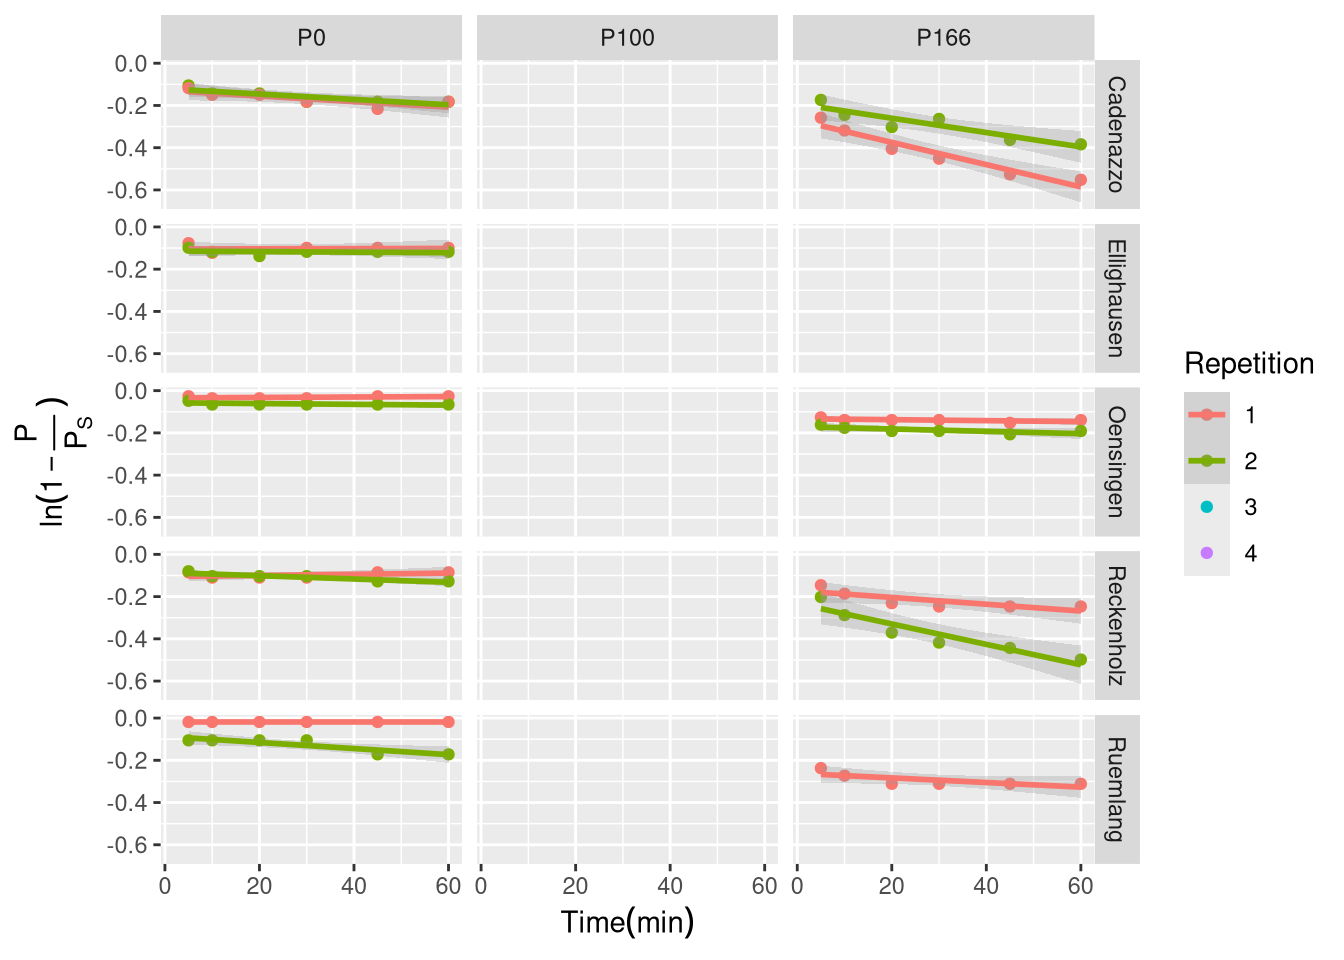

In [ ]:

res <- lmList(Y1 ~ t.min. | uid, d[d$Repetition==1|d$Repetition==2,],na.action = na.pass)


The relation can be improved:

= start): singular gradient

ℹ Please use `linewidth` instead.

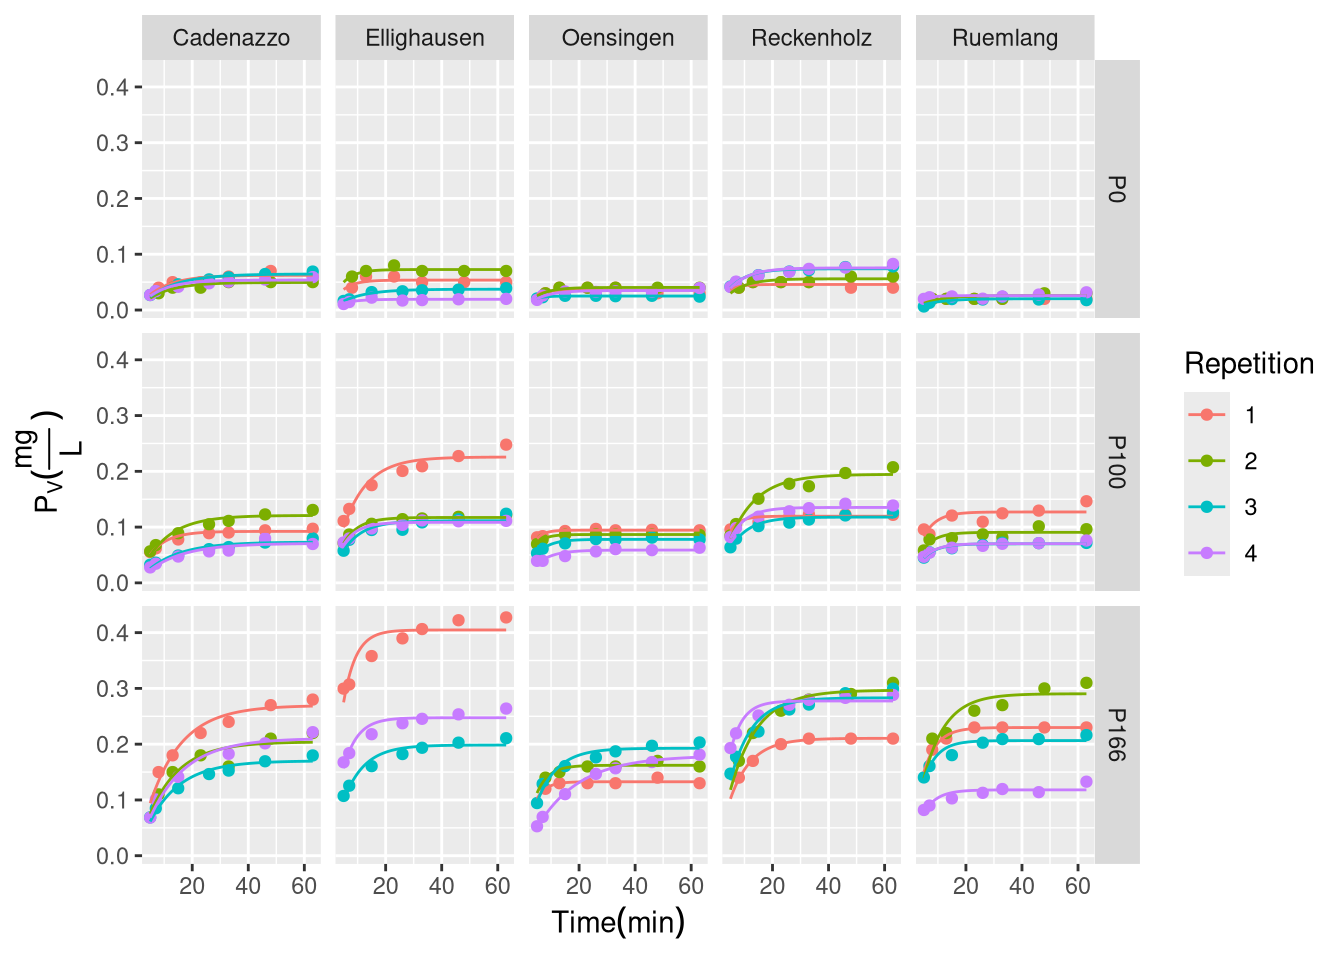

In [ ]:

Res <- nlsList(Pv.mg.L. ~ PS * (1 - exp(-k * (t.dt))) | uid, d[, c("Pv.mg.L.", "uid", "t.dt")],  start=list(PS=0.1,k=0.2))


Now we see how those parameters depend on the tratment:

Warning in nlme.formula(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)), fixed = PS + :
Iteration 1, LME step: nlminb() did not converge (code = 1). Do increase
'msMaxIter'!

Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded
Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded
Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded

Warning in nlme.formula(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)), fixed = PS + :
Iteration 1, LME step: nlminb() did not converge (code = 1). Do increase
'msMaxIter'!

Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded

= start): singular gradient

Warning in nlme.formula(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)), fixed = PS + :
Iteration 1, LME step: nlminb() did not converge (code = 1). Do increase
'msMaxIter'!

Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded
Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded

Warning in nlme.formula(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)), fixed = PS + :
Iteration 1, LME step: nlminb() did not converge (code = 1). Do increase
'msMaxIter'!

Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded

Warning in nlme.formula(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)), fixed = PS + :
Iteration 1, LME step: nlminb() did not converge (code = 1). Do increase
'msMaxIter'!

Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded
Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded

Warning in nlme.formula(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)), fixed = PS + :
Iteration 1, LME step: nlminb() did not converge (code = 1). Do increase
'msMaxIter'!

Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded

Warning in nlme.formula(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)), fixed = PS + :
Iteration 1, LME step: nlminb() did not converge (code = 1). Do increase
'msMaxIter'!

Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded

Warning in nlme.formula(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)), fixed = PS + :
Iteration 1, LME step: nlminb() did not converge (code = 1). Do increase
'msMaxIter'!

Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded
Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded
Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded

Warning in nlme.formula(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)), fixed = PS + :
Singular precision matrix in level -1, block 1

Warning in data.frame(PS = fixef["PS"], k = fixef["k"], ui = lvl, Site =
d.tmp[1, : row names were found from a short variable and have been discarded

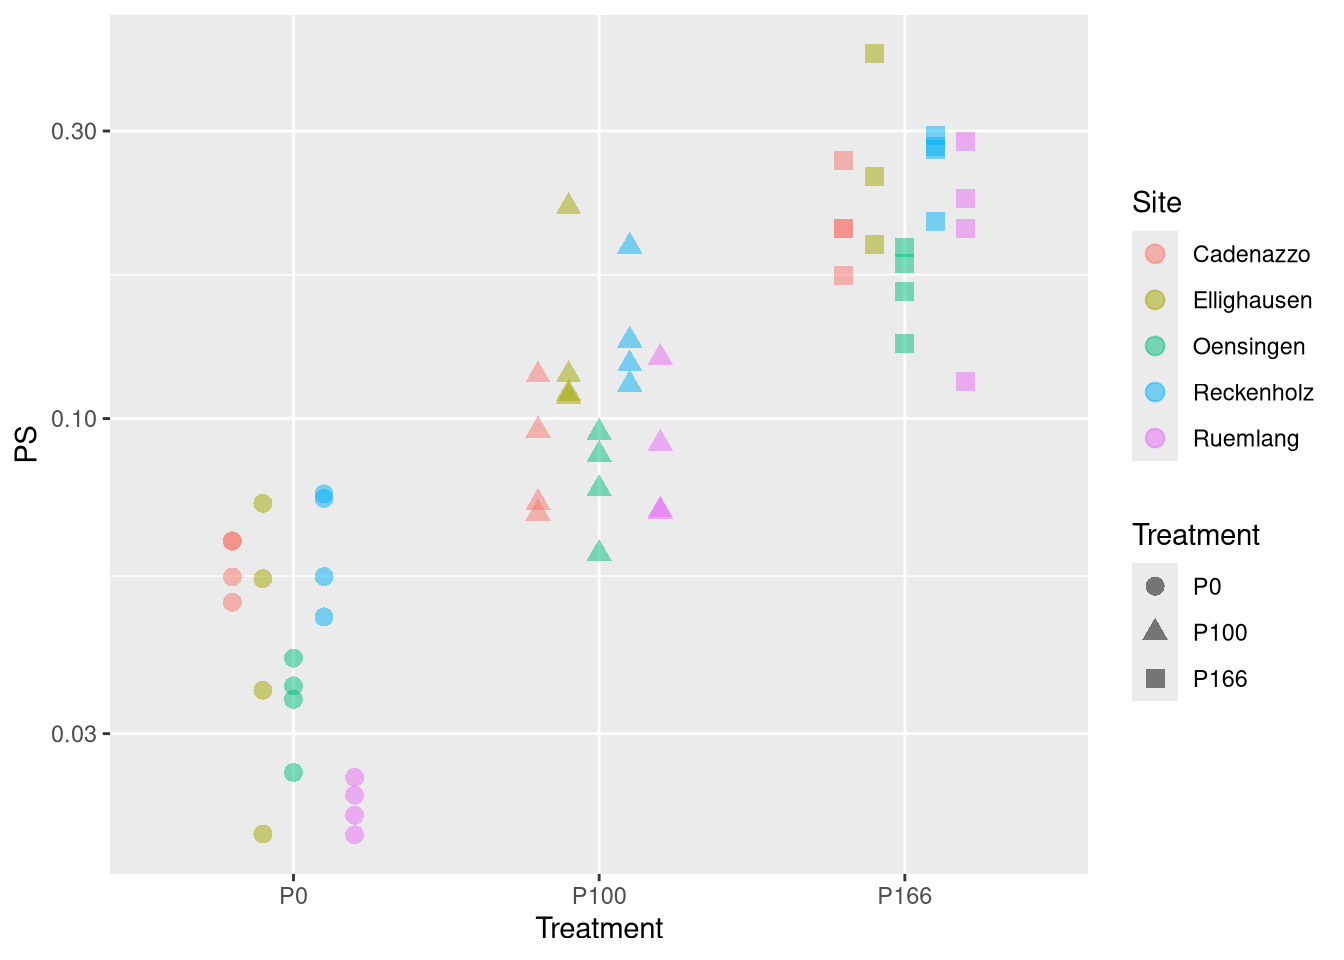

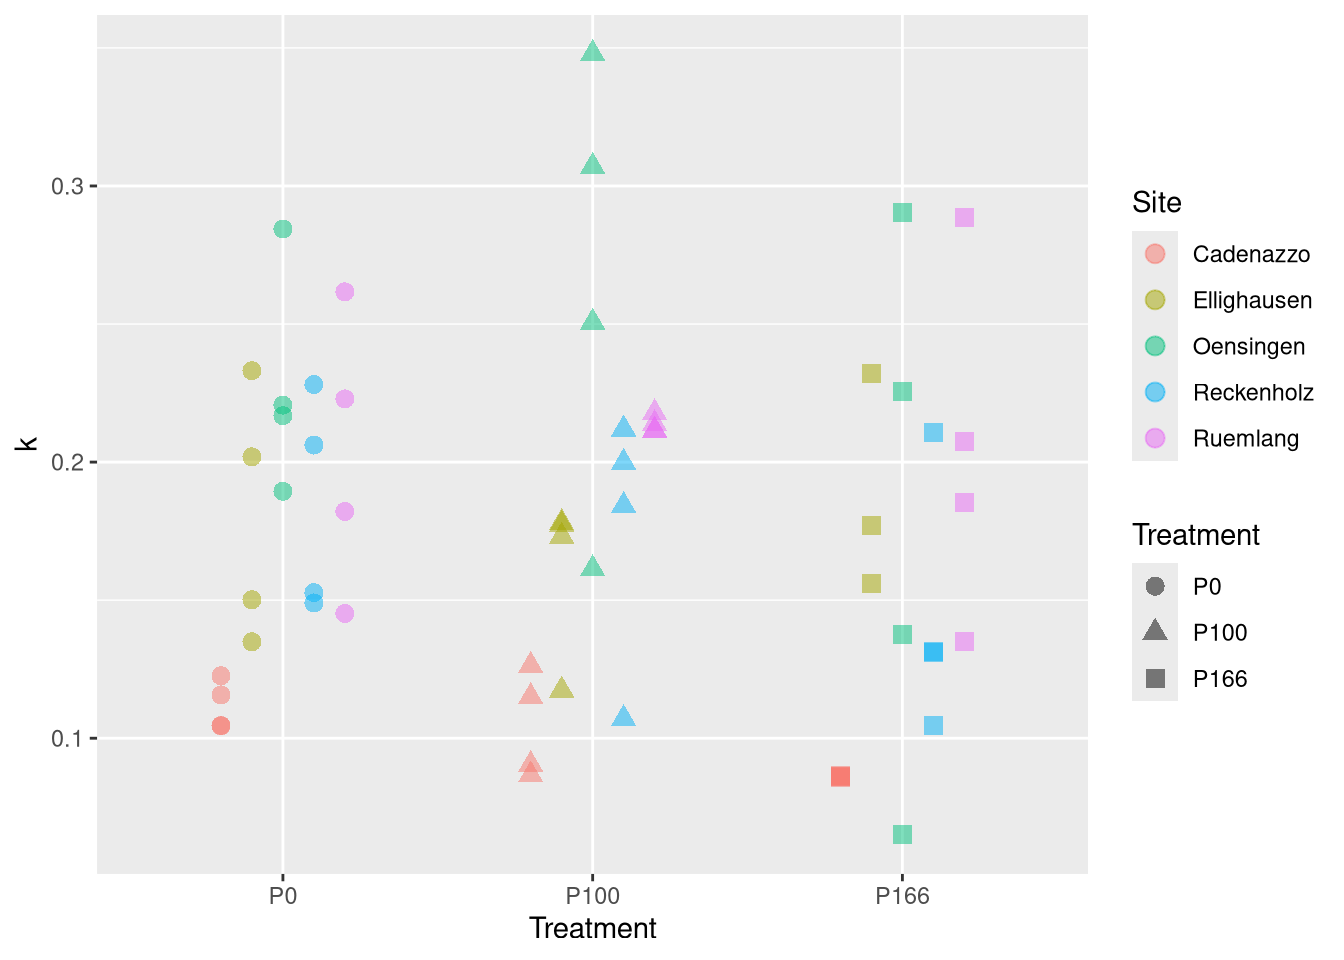

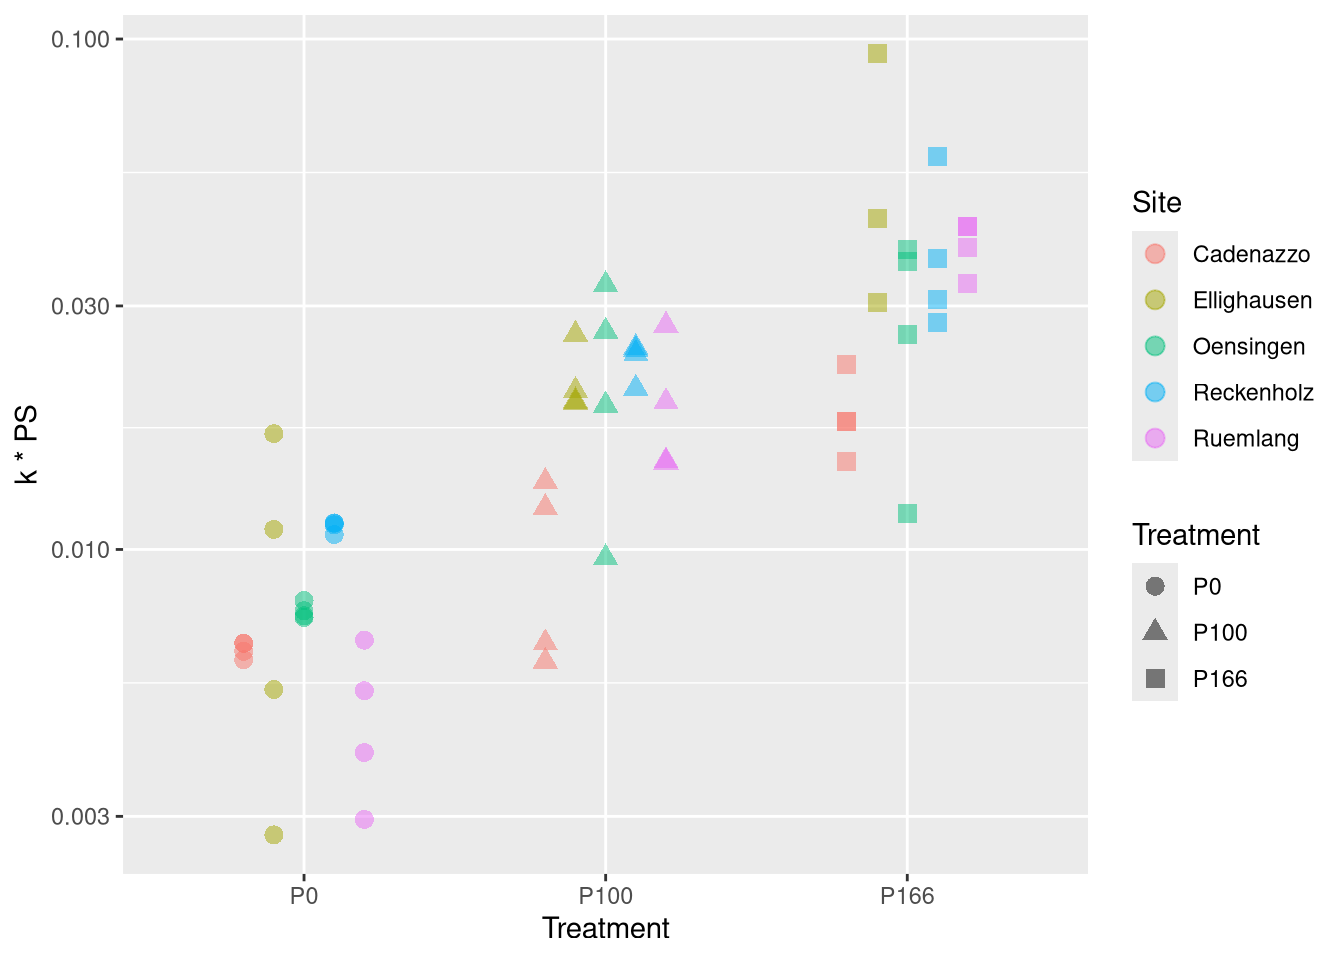

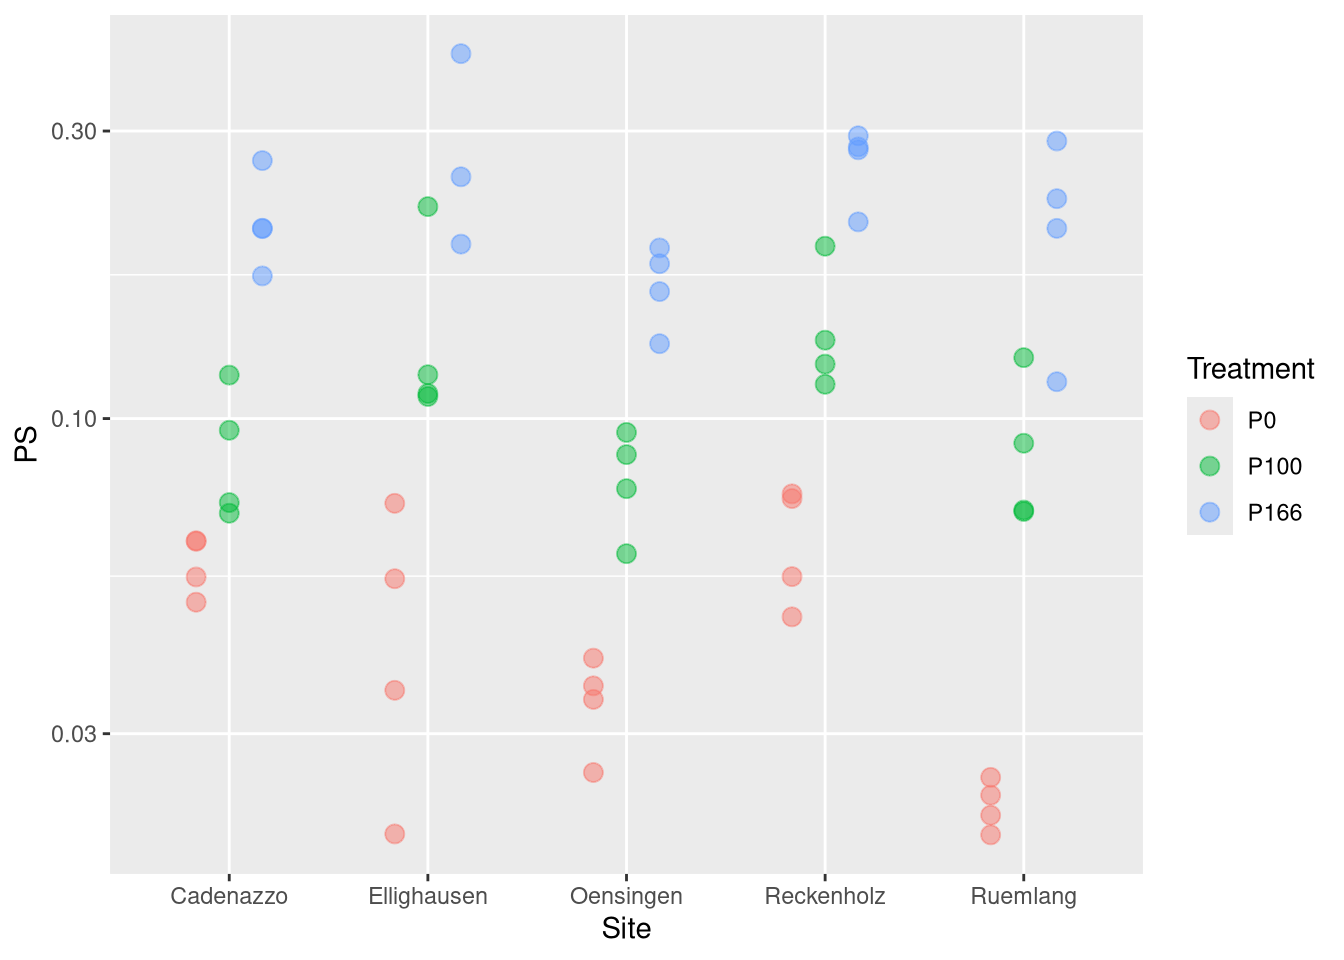

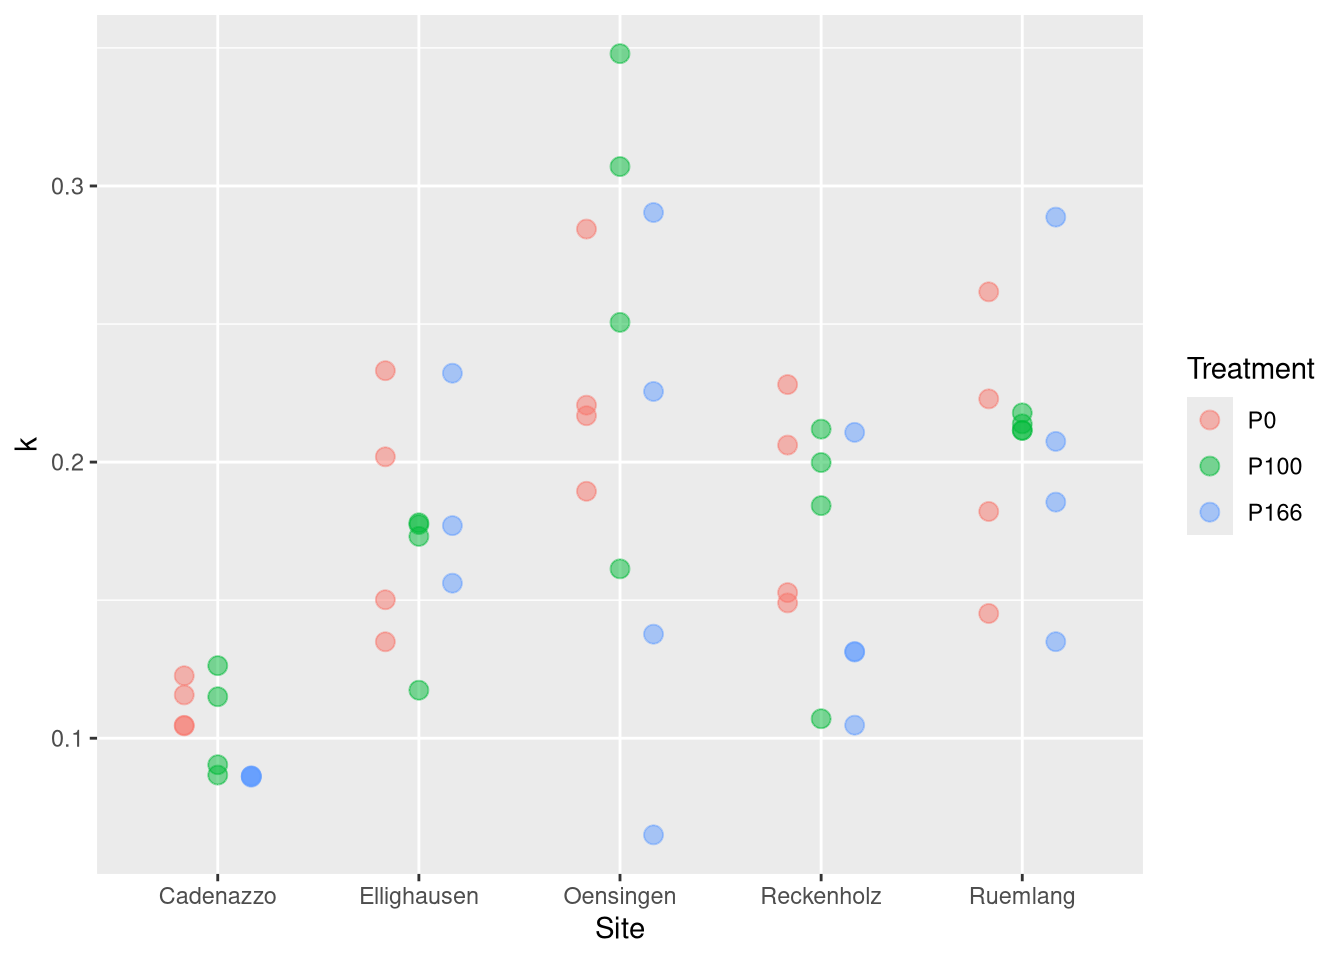

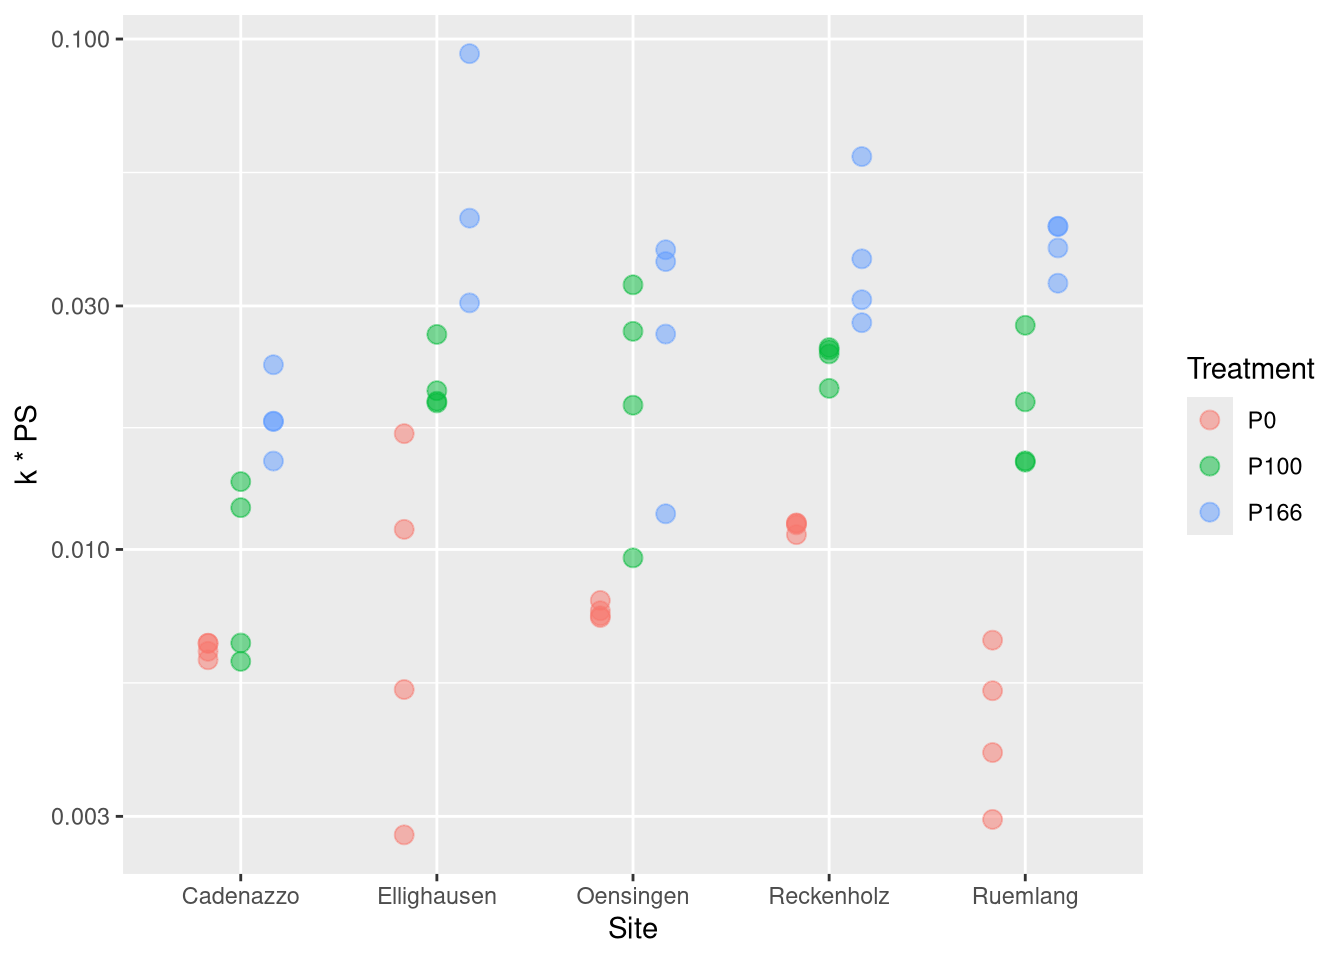

Anova Table (Type II tests)

Response: log(PS)
           Sum Sq Df  F value    Pr(>F)    
Treatment 27.6260  2 154.7655 < 2.2e-16 ***
Site       3.0383  4   8.5104 2.324e-05 ***
Residuals  4.6411 52                       
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = log(PS) ~ Treatment + Site, data = nlme.coef)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
P100 - P0 == 0    0.91948    0.09447   9.733   <1e-10 ***
P166 - P0 == 0    1.68127    0.09580  17.550   <1e-10 ***
P166 - P100 == 0  0.76179    0.09580   7.952   <1e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: k
            Sum Sq Df F value    Pr(>F)    
Treatment 0.007374  2  1.6124    0.2092    
Site      0.108427  4 11.8547 6.442e-07 ***
Residuals 0.118902 52                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = k ~ Treatment + Site, data = nlme.coef)

Linear Hypotheses:
                  Estimate Std. Error t value Pr(>|t|)
P100 - P0 == 0    0.003111   0.015121   0.206    0.977
P166 - P0 == 0   -0.022243   0.015334  -1.451    0.323
P166 - P100 == 0 -0.025354   0.015334  -1.653    0.233
(Adjusted p values reported -- single-step method)

Anova Table (Type II tests)

Response: I(log(k * PS))
           Sum Sq Df F value    Pr(>F)    
Treatment 22.4177  2 68.5970 2.609e-15 ***
Site       3.9298  4  6.0124 0.0004703 ***
Residuals  8.4969 52                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = I(log(k * PS)) ~ Treatment + Site, data = nlme.coef)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)    
P100 - P0 == 0     0.9127     0.1278   7.140  < 1e-05 ***
P166 - P0 == 0     1.5035     0.1296  11.599  < 1e-05 ***
P166 - P100 == 0   0.5908     0.1296   4.558 7.73e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.05971 0.05971     1 60.276  1.7198 0.194695   
soil_0_20_pH_H2O 0.00345 0.00345     1 70.953  0.0994 0.753472   
soil_0_20_Corg   0.36612 0.36612     1 50.241 10.5444 0.002079 **
soil_0_20_silt   0.01827 0.01827     1 82.723  0.5263 0.470228   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq   Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.0037589 0.0037589     1 66.215  2.9776 0.089090 . 
soil_0_20_pH_H2O 0.0103321 0.0103321     1 64.590  8.1844 0.005686 **
soil_0_20_Corg   0.0000556 0.0000556     1 66.276  0.0441 0.834382   
soil_0_20_silt   0.0082941 0.0082941     1 51.342  6.5701 0.013342 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning in RET$pfunction("adjusted", ...): Completion with error > abseps

Warning in RET$pfunction("adjusted", ...): Completion with error > abseps
Warning in RET$pfunction("adjusted", ...): Completion with error > abseps


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = k ~ soil_0_20_clay + soil_0_20_pH_H2O + soil_0_20_Corg + 
    soil_0_20_silt + (1 | year) + (1 | Site) + (1 | Site:block) + 
    (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)  
(Intercept) == 0      -0.130397   0.140751  -0.926   0.8027  
soil_0_20_clay == 0   -0.003849   0.002231  -1.726   0.2923  
soil_0_20_pH_H2O == 0  0.032934   0.011512   2.861   0.0190 *
soil_0_20_Corg == 0   -0.006614   0.031508  -0.210   0.9990  
soil_0_20_silt == 0    0.006743   0.002631   2.563   0.0442 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value  Pr(>F)  
soil_0_20_clay   0.005861 0.005861     1 82.839  0.0917 0.76273  
soil_0_20_pH_H2O 0.253558 0.253558     1 82.702  3.9692 0.04964 *
soil_0_20_Corg   0.017639 0.017639     1 70.803  0.2761 0.60090  
soil_0_20_silt   0.035303 0.035303     1 88.410  0.5526 0.45921  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning in RET$pfunction("adjusted", ...): Completion with error > abseps


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = I(log(k * PS)) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + (1 | year) + (1 | Site) + 
    (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept) == 0      -6.10829    1.31189  -4.656   <0.001 ***
soil_0_20_clay == 0   -0.00606    0.02001  -0.303    0.997    
soil_0_20_pH_H2O == 0  0.19127    0.09601   1.992    0.184    
soil_0_20_Corg == 0    0.12779    0.24319   0.525    0.974    
soil_0_20_silt == 0    0.01849    0.02487   0.743    0.911    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

In [ ]:

d$ui <- interaction(d$Site, d$Treatment)

nlme.coef.avg <- list()
nlme.coef <- list()
for (lvl in levels(d$ui)){
  d.tmp <- subset(d, ui == lvl)
  # first get nlsList coefs for comparison only (unused)
  temp_nls <- coef(nlsList(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)) | uid, 
                    d.tmp[, c("Pv.mg.L.", "uid", "t.dt")], 
                    start = list(PS = 0.1, k = 0.2)))
  nlsList_coefs <- c(apply(temp_nls, 2, \(x) c(mean=mean(x), sd=sd(x))))
  names(nlsList_coefs) <- c("PS.mean", "PS.sd", "k.mean", "k.sd")

  # now do the real thing
  model4 <- nlme(Pv.mg.L. ~ PS * (1 - exp(-k * t.dt)),
                fixed = PS + k ~ 1,
                random = PS + k  ~ 1 | uid,
                data = d.tmp[, c("Pv.mg.L.", "uid", "t.dt")],
                start = c(PS = 0.05, k = 0.12),
                control = nlmeControl(maxIter = 200))
  coef(model4)
  fixef <- model4$coefficients$fixed
  ranefs <- ranef(model4)
  colnames(ranefs) <- paste0("ranef_",colnames(ranefs))
  nlme.coef[[lvl]]  <- cbind(coef(model4), ranefs, Rep=1:nrow(ranef(model4)), ui=lvl, Site=d.tmp[1, "Site"], Treatment=d.tmp[1, "Treatment"], uid = rownames(coef(model4)))
  nlme.coef.avg[[lvl]] <- data.frame(PS=fixef["PS"], k=fixef["k"], ui=lvl, Site=d.tmp[1, "Site"], Treatment=d.tmp[1, "Treatment"], uid = d.tmp$uid)
}


In [ ]:
library(knitr)
library(kableExtra)

benchmark_results <- readRDS("cache/benchmark-tables.rds")

# Extract individual tables
Tables_yield <- benchmark_results$Tables_yield
Tables_yield_weather <- benchmark_results$Tables_yield_weather
Tables_earth_treatment <- benchmark_results$Tables_earth_treatment
Tables_earth_notreatment <- benchmark_results$Tables_earth_notreatment
Tables_yield_lm <- benchmark_results$Tables_yield_lm
Tables_yield_weather_lm <- benchmark_results$Tables_yield_weather_lm
Tables_earth_lm <- benchmark_results$Tables_earth_lm


In [ ]:
kable(Tables_yield_lm, 
     caption = "Linear model performance for predicting yield and P-balance variables using different P-dynamics variable sets (without weather data). Rows represent different predictor variable sets: 'k' uses only the release rate constant; 'PS' uses only log-transformed semi-labile P; 'kPS' uses both k and log-transformed PS plus their interaction; 'AAE10' uses only log-transformed AAE10-extractable P; 'CO2' uses only log-transformed CO2-extractable P; 'AAE10_CO2' uses both log-transformed AAE10 and CO2 extractable P plus their log-log interaction; 'AAE10_CO2_kPS' combines AAE10, CO2, k, and PS variables with interactions; 'CO2_kPS' combines CO2, k, and PS variables with interactions. Columns show explained variance for different target variables.",
     digits = 3) |>
 kable_styling(bootstrap_options = c("striped", "hover", "condensed"), 
               full_width = FALSE)


In [ ]:
kable(Tables_yield_weather_lm, 
      caption = "Linear model performance for predicting yield and P-balance variables including weather data. Rows represent different predictor variable sets: 'onlyweather' uses only weather variables (annual average temperature, annual sum precipitation, juvenile deviation precipitation/sun/temperature, annual sum sun, plus NA weather indicator); 'k' combines weather variables with release rate constant; 'PS' combines weather variables with log-transformed semi-labile P; 'kPS' combines weather variables with k, log-transformed PS, and their interaction; 'AAE10' combines weather variables with log-transformed AAE10-extractable P; 'CO2' combines weather variables with log-transformed CO2-extractable P; 'AAE10_CO2' combines weather variables with both extractable P measures and their interaction; 'AAE10_CO2_kPS' combines weather variables with all P-dynamics parameters; 'CO2_kPS' combines weather variables with CO2, k, and PS parameters.",
      digits = 3) |>
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"), 
                full_width = FALSE)


In [ ]:
kable(Tables_earth_lm, 
      caption = "Linear model performance comparison for predicting P-dynamics parameters from soil properties. Rows represent different target P-dynamics variables: 'PS_log' is log-transformed semi-labile phosphorus; 'k' is the phosphorus release rate constant; 'kPS_log' is log-transformed product of release rate and semi-labile P; 'P_AAE10_log' is log-transformed AAE10-extractable phosphorus; 'P_CO2_log' is log-transformed CO2-extractable phosphorus. The 'with_treatment' column uses soil variables (clay content, pH, organic carbon, silt content) plus treatment (P0 P100 P166), while 'without_treatment' uses only the soil variables.",
      digits = 3) |>
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"), 
                full_width = FALSE)
